In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

# **Connect Data**

In [3]:
data=pd.read_csv("/content/stroke_risk_dataset_v2.csv")

## **Explore Data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

size(35000,19)

no find null

In [5]:
#check null
data.isnull().sum()

,0
age,0
gender,0
chest_pain,0
high_blood_pressure,0
irregular_heartbeat,0
shortness_of_breath,0
fatigue_weakness,0
dizziness,0
swelling_edema,0
neck_jaw_pain,0


no find null

In [6]:
#check duplicated
data.duplicated().sum()

np.int64(16279)

duplicated(16279)

In [7]:
#drop duplicated
data.drop_duplicates(inplace=True)

In [8]:
#size data
data.shape

(18721, 19)

size data after duplicated (18721, 19)

In [9]:
data.columns

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
       'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom',
       'stroke_risk_percentage', 'at_risk'],
      dtype='object')

In [10]:
data.sample(5)

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
3910,47,Female,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,46.4,0
33996,54,Male,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,100.0,1
16948,20,Female,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,31.8,0
27512,59,Female,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,100.0,1
7375,47,Male,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,52.1,1


In [11]:
# unique each features without features ['stroke_risk_percentage', 'age']
columns_to_exclude = ['stroke_risk_percentage', 'age']
for column in data.columns:
    if column not in columns_to_exclude:
        print(f"Unique values for column '{column}': {data[column].unique()}")

Unique values for column 'gender': ['Male' 'Female']
Unique values for column 'chest_pain': [1 0]
Unique values for column 'high_blood_pressure': [0 1]
Unique values for column 'irregular_heartbeat': [0 1]
Unique values for column 'shortness_of_breath': [0 1]
Unique values for column 'fatigue_weakness': [0 1]
Unique values for column 'dizziness': [0 1]
Unique values for column 'swelling_edema': [0 1]
Unique values for column 'neck_jaw_pain': [0 1]
Unique values for column 'excessive_sweating': [0 1]
Unique values for column 'persistent_cough': [1 0]
Unique values for column 'nausea_vomiting': [0 1]
Unique values for column 'chest_discomfort': [0 1]
Unique values for column 'cold_hands_feet': [0 1]
Unique values for column 'snoring_sleep_apnea': [0 1]
Unique values for column 'anxiety_doom': [0 1]
Unique values for column 'at_risk': [0 1]


In [11]:
data[["age","stroke_risk_percentage"]].describe()

,age,stroke_risk_percentage
count,18721.000000,18721.000000
mean,43.205438,62.298029
std,11.894173,26.616096
min,18.000000,1.500000
25%,34.000000,40.400000
50%,42.000000,59.100000
75%,52.000000,88.400000
max,86.000000,100.000000


std < mean


mean close to median


result Near-normal

In [12]:
data["age"].unique()# unique age

array([22, 52, 63, 41, 53, 28, 37, 29, 30, 40, 25, 31, 27, 26, 64, 36, 49,
       68, 23, 35, 24, 43, 50, 39, 48, 32, 33, 38, 21, 34, 45, 46, 59, 20,
       62, 51, 47, 60, 54, 55, 44, 42, 57, 58, 56, 69, 65, 61, 72, 77, 67,
       73, 71, 19, 66, 70, 74, 80, 75, 82, 76, 18, 79, 78, 81, 83, 86, 85])

age[18 - 86]


In [13]:
data["age"].value_counts().head(10)# Top(10) age

,count
age,
33,626
32,622
31,621
35,615
30,607
36,596
37,593
50,593
34,584


In [14]:
data["at_risk"].value_counts()

,count
at_risk,
1,11524
0,7197


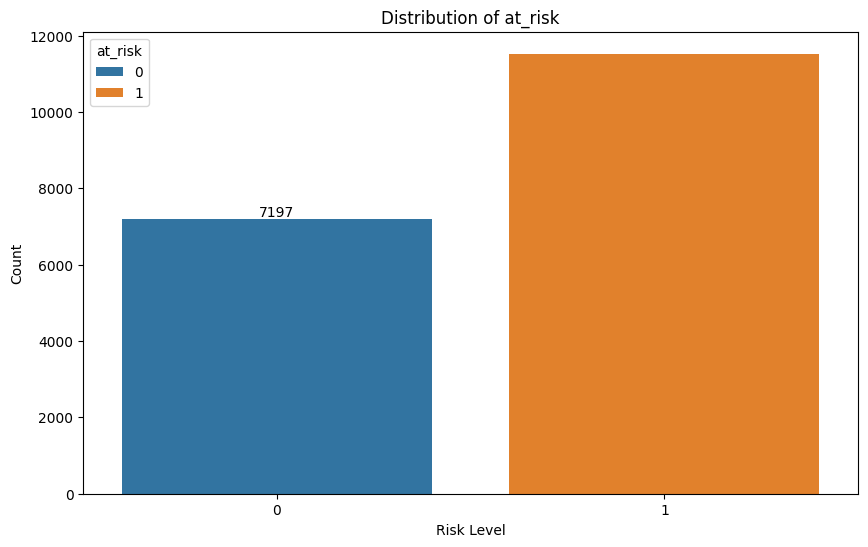

In [15]:
plt.figure(figsize=(10, 6))#size visualization
ax = sns.countplot(data=data, x='at_risk', hue='at_risk')
ax.bar_label(ax.containers[0]) # number each bar
plt.title('Distribution of at_risk') #title
plt.xlabel('Risk Level')# topic
plt.ylabel('Count')#count
plt.show()

In [16]:
#check value stroke_risk_percentage>100 or stroke_risk_percentage<=0
data[(data['stroke_risk_percentage'] > 100) | (data["stroke_risk_percentage"]<=0)]

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk


In [17]:
#check value stroke_risk_percentage<50
data[data['stroke_risk_percentage']<50]

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
5,28,Female,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13.9,0
6,37,Male,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,43.7,0
7,29,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34973,31,Female,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,40.2,0
34974,36,Female,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,33.3,0
34979,31,Female,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,35.2,0
34990,32,Male,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,43.6,0


In [18]:
#check value stroke_risk_percentage<50 and at_risk=1
data[(data['stroke_risk_percentage']<50) & (data['at_risk']==1)]

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk


In [19]:
#check value stroke_risk_percentage=50 and at_risk=0
data[(data['stroke_risk_percentage']==50) & (data['at_risk']==0)]

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
656,38,Male,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,50.0,0
781,49,Female,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,50.0,0
1031,49,Female,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,50.0,0
1531,38,Female,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,50.0,0
2246,38,Female,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31602,49,Female,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,50.0,0
32444,38,Female,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,50.0,0
32846,38,Male,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,50.0,0
32915,38,Female,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,50.0,0


In [20]:
data[data['stroke_risk_percentage']>=50] #check value stroke_risk_percentage>=50

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1
13,52,Male,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,92.5,1
17,64,Female,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34978,58,Female,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,80.0,1
34986,37,Female,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,52.6,1
34987,50,Male,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,100.0,1
34988,46,Male,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,87.7,1


In [21]:
#check value stroke_risk_percentage=50 and at_risk=1
data[(data['stroke_risk_percentage']==50) & (data['at_risk']==1)]

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
774,41,Male,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,50.0,1
2857,41,Male,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,50.0,1
10515,41,Male,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,50.0,1
15178,41,Male,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,50.0,1
15433,58,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50.0,1
15887,41,Male,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,50.0,1
34809,41,Male,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,50.0,1


In [22]:
#check value stroke_risk_percentage>50 and at_risk=0
data[(data['stroke_risk_percentage']>50) & (data['at_risk']==0)]

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk


In [23]:
data.columns

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
       'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom',
       'stroke_risk_percentage', 'at_risk'],
      dtype='object')

(stroke_risk_percentage < 50) and (at risk=0) (7124,19)

(stroke_risk_percentage >=50) and (at_risk=1) (11597,19)


(stroke_risk_percentage == 50) and (at risk=0) (73,19)

(stroke_risk_percentage == 50) and (at risk=1) (7,19)

In [24]:
# Filter data
filtered_no = data[(data['stroke_risk_percentage'] <= 50) & (data['at_risk'] == 0)]
features = ['chest_pain', 'high_blood_pressure', 'irregular_heartbeat',
            'shortness_of_breath', 'fatigue_weakness', 'dizziness',
            'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
            'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
            'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom']

# Calculate number of features = 1 for each row
feature_counts = filtered_no[features].sum(axis=1)

# Count patients based on feature count conditions
less_than_3 = (feature_counts < 3).sum()
equal_to_3 = (feature_counts == 3).sum()
more_than_3 = (feature_counts > 3).sum()
total_patients = len(filtered_no)

# Results
print("Patients count by number of features = 1 and risk=0:")
print(f"Less than 3 features = 1: {less_than_3} patients ({less_than_3/total_patients*100:.1f}%)")
print(f"Exactly 3 features = 1: {equal_to_3} patients ({equal_to_3/total_patients*100:.1f}%)")
print(f"More than 3 features = 1: {more_than_3} patients ({more_than_3/total_patients*100:.1f}%)")
print(f"Total patients: {total_patients}")


Patients count by number of features = 1 and risk=0:
Less than 3 features = 1: 4480 patients (62.2%)
Exactly 3 features = 1: 2360 patients (32.8%)
More than 3 features = 1: 357 patients (5.0%)
Total patients: 7197


In [25]:
# Data for visualization
categories = ['< 3 features', '= 3 features', '> 3 features']
counts = [less_than_3, equal_to_3, more_than_3]
percentages = [62.2, 32.8, 5.0]  # From your output

fig = px.bar(x=categories,
             y=percentages,
             text=[f'{p}%' for p in percentages],
             title='Patients with Risk=0 and Stroke Risk <= 50%<br>Distribution by Number of Symptoms',
             labels={'x': 'Number of Symptoms = 1', 'y': 'Percentage of Patients (%)'},
             color=categories,
             color_discrete_sequence=['green', 'orange', 'red'])

#fig.update_traces(textposition='outside')
#fig.update_layout(showlegend=False,
                #  yaxis_range=[0, 70])  # Adjust y-axis for better visualization
fig.show()

In [26]:
# Filter data
filtered_yes = data[(data['stroke_risk_percentage'] >= 50) & (data['at_risk'] == 1)]

# Calculate number of features = 1 for each row
feature_counts = filtered_yes[features].sum(axis=1)

# Count patients based on feature count conditions
less_than_3 = (feature_counts < 3).sum()
equal_to_3 = (feature_counts == 3).sum()
more_than_3 = (feature_counts > 3).sum()
total_patients = len(filtered_yes)

# Results
print("Patients count by number of features = 1 and risk = 1:")
print(f"Less than 3 features = 1: {less_than_3} patients ({less_than_3/total_patients*100:.1f}%)")
print(f"Exactly 3 features = 1: {equal_to_3} patients ({equal_to_3/total_patients*100:.1f}%)")
print(f"More than 3 features = 1: {more_than_3} patients ({more_than_3/total_patients*100:.1f}%)")
print(f"Total patients: {total_patients}")


Patients count by number of features = 1 and risk = 1:
Less than 3 features = 1: 1443 patients (12.5%)
Exactly 3 features = 1: 3220 patients (27.9%)
More than 3 features = 1: 6861 patients (59.5%)
Total patients: 11524


In [27]:
# Data for visualization
categories = ['< 3 features', '= 3 features', '> 3 features']
counts = [less_than_3, equal_to_3, more_than_3]
percentages = [12.5, 27.9, 59.5]  # From your output

fig = px.bar(x=categories,
             y=percentages,
             text=[f'{p}%' for p in percentages],
             title='Patients with Risk=1 and Stroke Risk ≥ 50%<br>Distribution by Number of Symptoms',
             labels={'x': 'Number of Symptoms = 1', 'y': 'Percentage of Patients (%)'},
             color=categories,
             color_discrete_sequence=['green', 'orange', 'red'])

#fig.update_traces(textposition='outside')
#fig.update_layout(showlegend=False,
                #  yaxis_range=[0, 70])  # Adjust y-axis for better visualization
fig.show()

/tmp/ipython-input-1337318918.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='stroke_risk_percentage', ylabel='Density'>

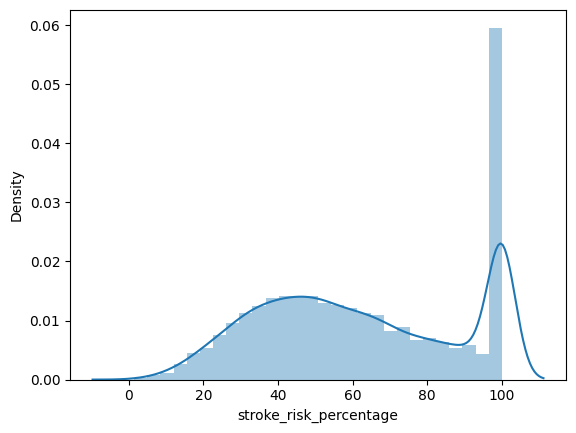

In [28]:
sns.distplot(data['stroke_risk_percentage'])

In [29]:
from scipy.stats import skew

# Calculate skewness
skewness = data['stroke_risk_percentage'].skew()

print(f"Skewness: {skewness}")
if skewness > 0:
    print("The data is right-skewed (positively skewed).")
elif skewness < 0:
    print("The data is left-skewed (negatively skewed).")
else:
    print("The data is symmetrical.")


Skewness: 0.07700100053563312
The data is right-skewed (positively skewed).


In [30]:
# List of all your feature columns
features = [
    'gender', 'chest_pain', 'high_blood_pressure', 'irregular_heartbeat',
    'shortness_of_breath', 'fatigue_weakness', 'dizziness', 'swelling_edema',
    'neck_jaw_pain', 'excessive_sweating', 'persistent_cough', 'nausea_vomiting',
    'chest_discomfort', 'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom','at_risk'
]

# Loop for pie charts (binary features)
for feature in features:
    fig = px.pie(data, names=feature, title=f'{feature} Distribution')
    fig.show()


In [31]:
fig = px.histogram(data,
                   x="gender", # topic
                   color="at_risk", #value
                   title='Distribution of Gender by Risk Status',
                   barmode='group',# group gender for risk result 0 -1
                   text_auto=True)
fig.show()

In [32]:
fig = px.histogram(data,
                   x="stroke_risk_percentage", #topic
                   color="at_risk",#value
                   title='Distribution of Gender by Risk Status',
                   barmode='group',# group stroke_risk_percentage for risk result 0 -1
                   text_auto=True)
fig.show()

In [33]:
import plotly.express as px#
#boxplot age
fig = px.box(data, y='age', title='Box Plot of Age')
fig.show()

In [34]:
#boxplot stroke_risk_percentage
fig = px.box(data, y='stroke_risk_percentage', title='Box Plot of stroke_risk_percentage')
fig.show()

In [15]:
# Medical age groups
bins = [0, 18, 35, 50, 65, 120]
labels = ['0-18', '18-35', '36-50', '51-65', '65+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

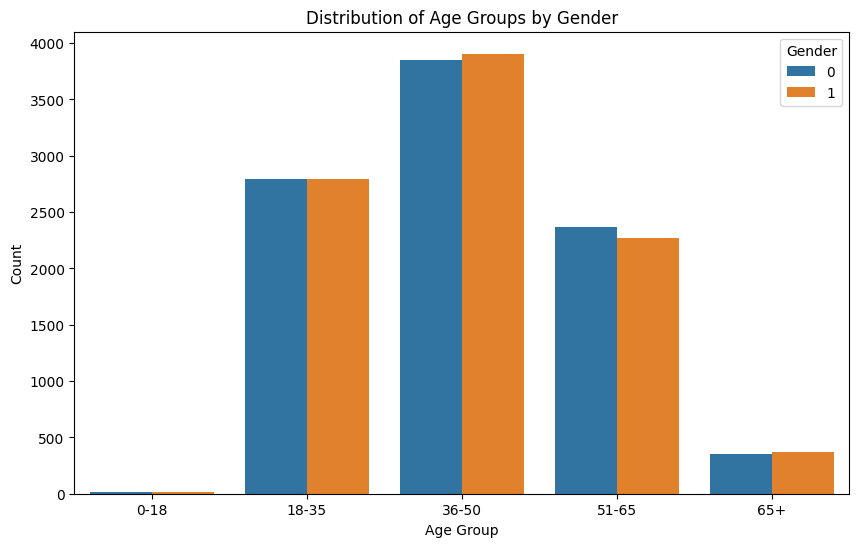

In [16]:


# Option 2: With hue (if you have another categorical variable)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='gender')
plt.title('Distribution of Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


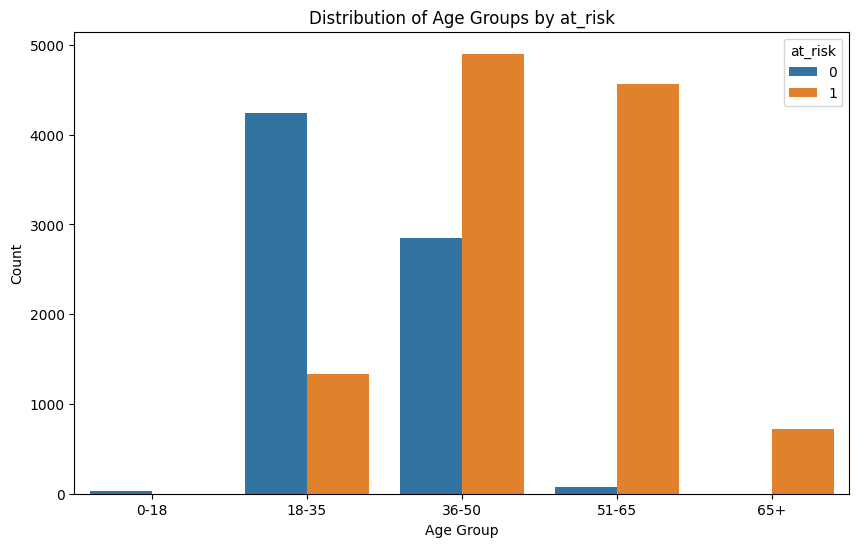

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='at_risk')
plt.title('Distribution of Age Groups by at_risk')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='at_risk')
plt.show()


In [38]:
fig = px.box(data, x='age_group',y="stroke_risk_percentage", title='Box Plot of age stroke_risk_percentage',color="age_group")
fig.show()

In [ ]:
data.sample(5)

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk,age_group
4183,49,Female,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,64.5,1,36-50
2485,31,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,32.8,0,18-35
15388,34,Female,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,38.9,0,18-35
26097,40,Male,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,72.9,1,36-50
1545,33,Male,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,54.4,1,18-35


In [ ]:
data.columns

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
       'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom',
       'stroke_risk_percentage', 'at_risk', 'age_group'],
      dtype='object')

# convert text

In [12]:
# Assuming 0 = Male, 1 = Female (adjust as needed)
data['gender'] = data['gender'].map({"Male": 0, "Female": 1})

In [183]:
data.head(2)

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,stroke_risk_percentage,at_risk,age_group
0,22,0,1,0,0,0,0,0,0,0,0,1,0,0,0,33.3,0,18-35
1,52,0,0,1,1,0,0,0,0,0,0,0,0,1,1,100.0,1,51-65


# **correlation**

In [49]:
data.corr(numeric_only=True)

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
age,1.000000,-0.008731,0.081320,0.169406,0.108315,0.066728,0.071479,0.067604,0.080196,0.108425,0.024827,0.075872,0.033184,0.083696,0.069648,0.105728,0.029158,0.809425,0.616690
gender,-0.008731,1.000000,-0.006707,-0.004484,-0.009660,-0.008111,0.006675,0.001415,0.003407,0.008393,0.009437,-0.002596,-0.011919,-0.003206,0.000220,0.001984,0.010498,-0.113343,-0.096206
chest_pain,0.081320,-0.006707,1.000000,0.003434,-0.008081,-0.013342,-0.019636,-0.006700,-0.021672,-0.014090,-0.028419,-0.016629,-0.032564,-0.014066,-0.012688,-0.009243,-0.019338,0.250715,0.223533
high_blood_pressure,0.169406,-0.004484,0.003434,1.000000,0.018553,0.009669,0.002859,0.002223,0.009729,0.008457,-0.018321,0.004566,-0.026021,0.003256,0.004787,0.013531,-0.014850,0.386726,0.323013
irregular_heartbeat,0.108315,-0.009660,-0.008081,0.018553,1.000000,-0.016634,-0.008768,-0.013314,-0.005686,-0.016296,-0.029102,-0.020489,-0.023169,-0.021812,-0.016451,0.001947,-0.017617,0.189284,0.159728
shortness_of_breath,0.066728,-0.008111,-0.013342,0.009669,-0.016634,1.000000,-0.008820,-0.013470,-0.022612,-0.006441,-0.017910,-0.017922,-0.022431,-0.015022,-0.000090,-0.016248,-0.015585,0.205157,0.180571
fatigue_weakness,0.071479,0.006675,-0.019636,0.002859,-0.008768,-0.008820,1.000000,-0.019642,-0.012800,-0.013763,-0.019338,0.002176,-0.009872,-0.008980,-0.011662,-0.020882,-0.014328,0.148982,0.129763
dizziness,0.067604,0.001415,-0.006700,0.002223,-0.013314,-0.013470,-0.019642,1.000000,-0.015409,-0.014963,-0.029141,-0.016828,-0.024276,-0.026010,-0.025938,-0.000863,-0.028198,0.139362,0.113123
swelling_edema,0.080196,0.003407,-0.021672,0.009729,-0.005686,-0.022612,-0.012800,-0.015409,1.000000,-0.007451,-0.021933,-0.030950,-0.020586,-0.019719,-0.011149,0.011950,-0.024780,0.135270,0.105671
neck_jaw_pain,0.108425,0.008393,-0.014090,0.008457,-0.016296,-0.006441,-0.013763,-0.014963,-0.007451,1.000000,-0.021394,-0.036476,-0.015012,-0.019691,-0.020059,-0.010327,-0.029407,0.132375,0.088497


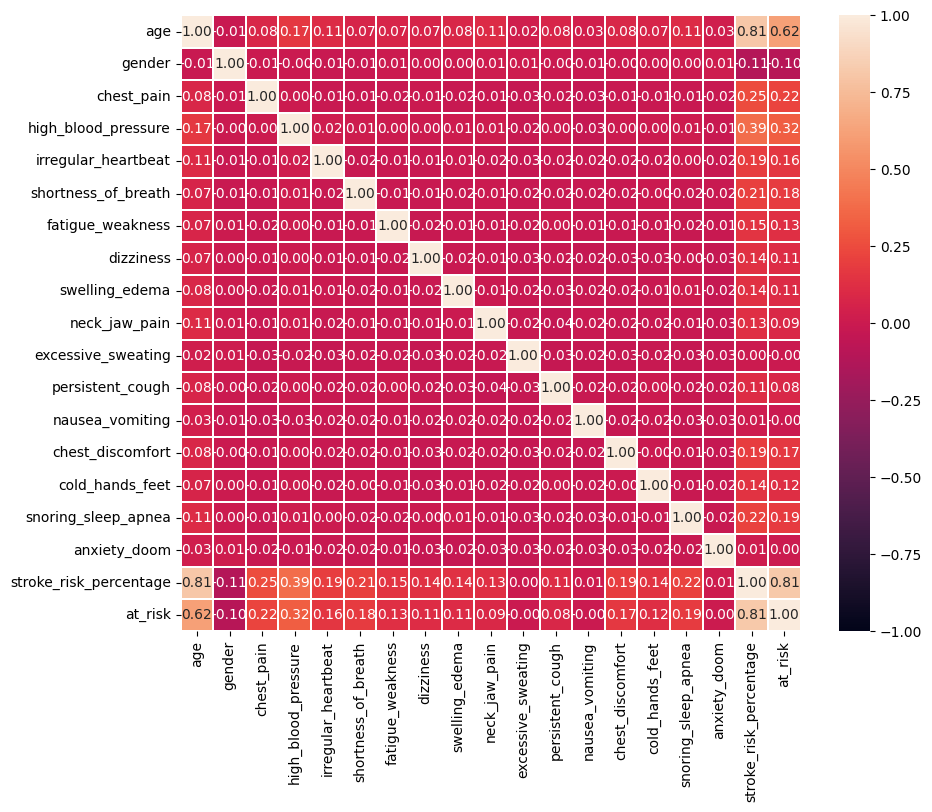

In [50]:
#Corr() relationship columns
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f',linewidth=.15,vmin=-1,vmax=1)
plt.show()

In [51]:
# Corr() effect all features on output
data.corr(numeric_only=True)["at_risk"].sort_values(ascending=False)[1:]

,at_risk
stroke_risk_percentage,0.813360
age,0.616690
high_blood_pressure,0.323013
chest_pain,0.223533
snoring_sleep_apnea,0.186840
shortness_of_breath,0.180571
chest_discomfort,0.167195
irregular_heartbeat,0.159728
fatigue_weakness,0.129763
cold_hands_feet,0.119944


# **Filter method**

In [52]:
from sklearn.feature_selection import mutual_info_classif

In [55]:
X = data.drop(['at_risk','age_group'], axis=1).copy()
y = data['at_risk']


# Calculate Mutual Information
mi = mutual_info_classif(X, y)

In [56]:
mi

array([0.25416145, 0.00168444, 0.02411711, 0.05940665, 0.01645333,
       0.00966565, 0.00476013, 0.01122607, 0.01035919, 0.        ,
       0.        , 0.00082672, 0.        , 0.01465582, 0.004003  ,
       0.01880013, 0.00066861, 0.66522685])

In [57]:
results = pd.DataFrame({
    "Feature": X.columns,
    "Mutual Information Score": mi
})

In [58]:
results.sort_values(by="Mutual Information Score",ascending=False)


,Feature,Mutual Information Score
17,stroke_risk_percentage,0.665227
0,age,0.254161
3,high_blood_pressure,0.059407
2,chest_pain,0.024117
15,snoring_sleep_apnea,0.018800
4,irregular_heartbeat,0.016453
13,chest_discomfort,0.014656
7,dizziness,0.011226
8,swelling_edema,0.010359
5,shortness_of_breath,0.009666


# RFE

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [60]:
model=RandomForestClassifier(random_state=42)
rfe=RFE(estimator=model, n_features_to_select=15)
rfe.fit(X,y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)

In [61]:
selected_features=X.columns[rfe.support_]# support boolean feature 0,1
selected_features

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'persistent_cough',
       'chest_discomfort', 'cold_hands_feet', 'snoring_sleep_apnea',
       'stroke_risk_percentage'],
      dtype='object')

nausea_vomiting

anxiety_doom

excessive_sweating

In [65]:
data.columns

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'chest_discomfort', 'cold_hands_feet',
       'snoring_sleep_apnea', 'stroke_risk_percentage', 'at_risk',
       'age_group'],
      dtype='object')

In [13]:
data = data.drop(['anxiety_doom', 'nausea_vomiting'], axis=1)

In [17]:

from sklearn.model_selection import train_test_split

X = data.drop(['at_risk','age_group','stroke_risk_percentage'], axis=1)
y = data['at_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [67]:
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 13104
Test size: 5617


In [69]:
X_train.columns

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'chest_discomfort', 'cold_hands_feet',
       'snoring_sleep_apnea'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
scaler.fit(X_train)
X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score,auc, roc_curve, roc_auc_score,mean_squared_error,precision_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import *


# **LogisticRegression**

In [31]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1%}")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))

Accuracy: 96.8%
[[2086   96]
 [  86 3349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2182
           1       0.97      0.97      0.97      3435

    accuracy                           0.97      5617
   macro avg       0.97      0.97      0.97      5617
weighted avg       0.97      0.97      0.97      5617

ROC AUC: 0.9960912827861143


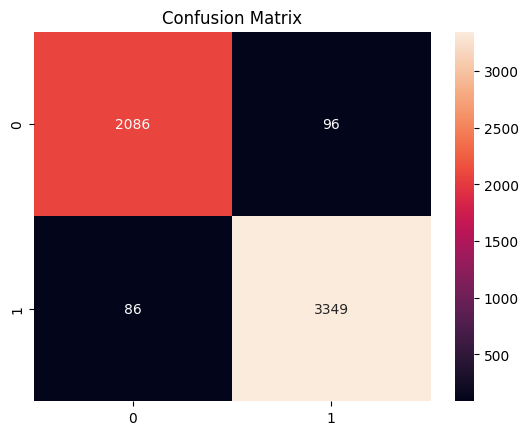

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

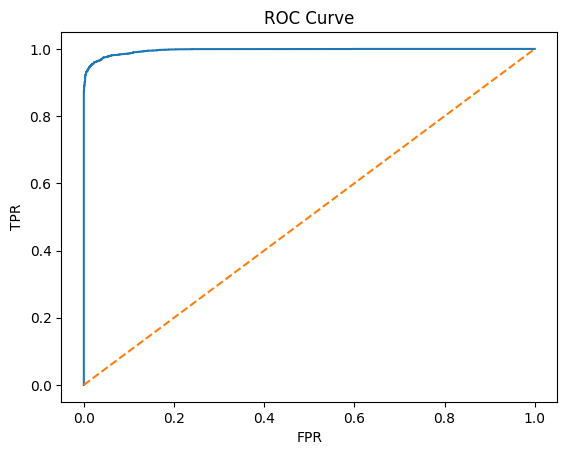

In [33]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

# test

In [34]:
# Quick check of first 5 samples
for i in range(30):
    actual = y_test.iloc[i]; pred = model.predict(X_test.iloc[i:i+1])[0]
    print(f"Sample {i}: Actual={actual}, Predicted={pred}, {'✓' if actual==pred else '✗'}")

Sample 0: Actual=0, Predicted=1, ✗
Sample 1: Actual=1, Predicted=1, ✓
Sample 2: Actual=1, Predicted=0, ✗
Sample 3: Actual=1, Predicted=1, ✓
Sample 4: Actual=1, Predicted=1, ✓
Sample 5: Actual=0, Predicted=0, ✓
Sample 6: Actual=1, Predicted=1, ✓
Sample 7: Actual=0, Predicted=0, ✓
Sample 8: Actual=0, Predicted=0, ✓
Sample 9: Actual=1, Predicted=1, ✓
Sample 10: Actual=1, Predicted=1, ✓
Sample 11: Actual=0, Predicted=0, ✓
Sample 12: Actual=1, Predicted=1, ✓
Sample 13: Actual=1, Predicted=1, ✓
Sample 14: Actual=0, Predicted=0, ✓
Sample 15: Actual=1, Predicted=1, ✓
Sample 16: Actual=1, Predicted=1, ✓
Sample 17: Actual=1, Predicted=1, ✓
Sample 18: Actual=0, Predicted=0, ✓
Sample 19: Actual=1, Predicted=1, ✓
Sample 20: Actual=1, Predicted=1, ✓
Sample 21: Actual=1, Predicted=1, ✓
Sample 22: Actual=1, Predicted=1, ✓
Sample 23: Actual=1, Predicted=1, ✓
Sample 24: Actual=1, Predicted=1, ✓
Sample 25: Actual=0, Predicted=0, ✓
Sample 26: Actual=1, Predicted=1, ✓
Sample 27: Actual=1, Predicted=1, ✓
Sa

In [132]:
# # 7. Optional: show a sample prediction
# print("Sample prediction for first test instance:", model.predict([X_test[3]]))

In [108]:
# Take actual samples from your test set with known labels
sample_indices = [50, 200, 100]  # Choose some indices from test set
for idx in sample_indices:
    sample_data = X_test.iloc[idx:idx+1]
    true_label = y_test.iloc[idx]
    pred = model.predict(sample_data)[0]
    prob = model.predict_proba(sample_data)[0, 1]

    print(f"Sample {idx}: Pred={pred} (Prob: {prob:.1%}), "
          f"True={true_label}, Correct={'✓' if pred==true_label else '✗'}")

Sample 50: Pred=1 (Prob: 83.3%), True=1, Correct=✓
Sample 200: Pred=0 (Prob: 0.0%), True=0, Correct=✓
Sample 100: Pred=0 (Prob: 21.4%), True=1, Correct=✗


In [101]:
# Test with sample values (modify as needed)
sample_data = pd.DataFrame([[30,0,0,0,0,1,0,0,1,0,0,0,0,0,1]], columns=X_train.columns)
print(f"Prediction: {model.predict(sample_data)[0]}, Probability: {model.predict_proba(sample_data)[0,1]:.1%}")

Prediction: 0, Probability: 12.4%


# **SVC**

In [133]:
kernels = ['linear']
for kernel in kernels:
    model = SVC(random_state=42, probability=True, kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel={kernel:8} Accuracy: {accuracy:.1%}")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_proba)))

Kernel=linear   Accuracy: 96.6%
[[2095   87]
 [ 105 3330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2182
           1       0.97      0.97      0.97      3435

    accuracy                           0.97      5617
   macro avg       0.96      0.96      0.96      5617
weighted avg       0.97      0.97      0.97      5617

ROC AUC: 0.988


In [139]:
# Test with sample values (modify as needed)
sample_data = pd.DataFrame([[40,1,0,0,0,1,0,0,1,0,0,0,0,0,1]], columns=X_train.columns)
print(f"Prediction: {model.predict(sample_data)[0]}, Probability: {model.predict_proba(sample_data)[0,1]:.1%}")

Prediction: 1, Probability: 88.1%


In [150]:
y_test.head(7)

,at_risk
23389,0
34588,1
29876,1
13915,1
33311,1
16057,0
371,1


In [155]:
# Quick check of first 5 samples
for i in range(30):
    actual = y_test.iloc[i]; pred = model.predict(X_test.iloc[i:i+1])[0]
    print(f"Sample {i}: Actual={actual}, Predicted={pred}, {'✓' if actual==pred else '✗'}")

Sample 0: Actual=0, Predicted=1, ✗
Sample 1: Actual=1, Predicted=1, ✓
Sample 2: Actual=1, Predicted=0, ✗
Sample 3: Actual=1, Predicted=1, ✓
Sample 4: Actual=1, Predicted=1, ✓
Sample 5: Actual=0, Predicted=0, ✓
Sample 6: Actual=1, Predicted=1, ✓
Sample 7: Actual=0, Predicted=0, ✓
Sample 8: Actual=0, Predicted=0, ✓
Sample 9: Actual=1, Predicted=1, ✓
Sample 10: Actual=1, Predicted=1, ✓
Sample 11: Actual=0, Predicted=0, ✓
Sample 12: Actual=1, Predicted=1, ✓
Sample 13: Actual=1, Predicted=1, ✓
Sample 14: Actual=0, Predicted=0, ✓
Sample 15: Actual=1, Predicted=1, ✓
Sample 16: Actual=1, Predicted=1, ✓
Sample 17: Actual=1, Predicted=1, ✓
Sample 18: Actual=0, Predicted=0, ✓
Sample 19: Actual=1, Predicted=1, ✓
Sample 20: Actual=1, Predicted=1, ✓
Sample 21: Actual=1, Predicted=1, ✓
Sample 22: Actual=1, Predicted=1, ✓
Sample 23: Actual=1, Predicted=1, ✓
Sample 24: Actual=1, Predicted=1, ✓
Sample 25: Actual=0, Predicted=0, ✓
Sample 26: Actual=1, Predicted=1, ✓
Sample 27: Actual=1, Predicted=1, ✓
Sa

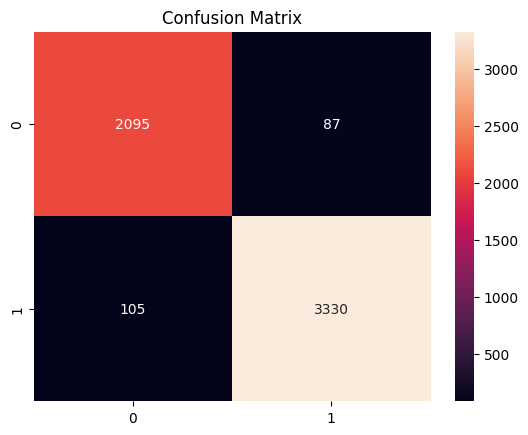

In [124]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

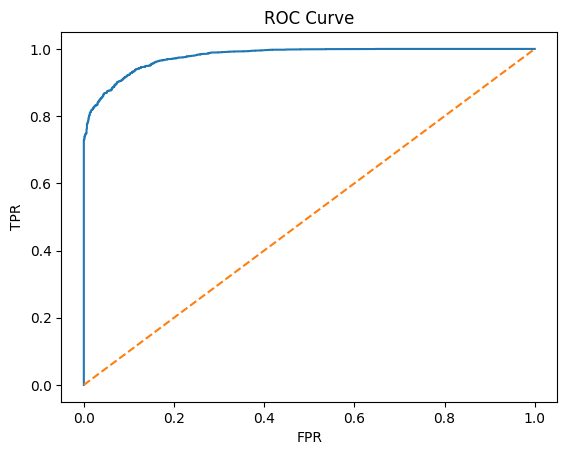

In [125]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

# **AdaBoost**

In [27]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1%}")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_proba)))

Accuracy: 91.7%
[[1934  248]
 [ 217 3218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2182
           1       0.93      0.94      0.93      3435

    accuracy                           0.92      5617
   macro avg       0.91      0.91      0.91      5617
weighted avg       0.92      0.92      0.92      5617

ROC AUC: 0.978


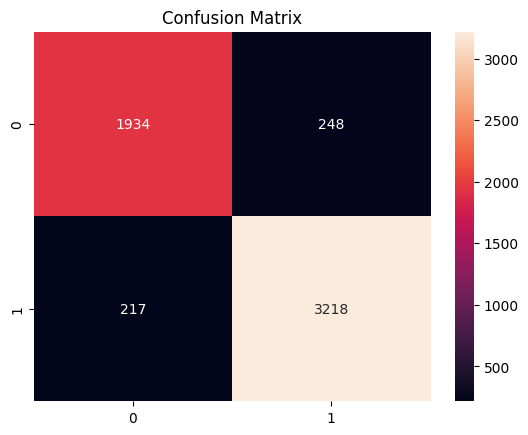

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

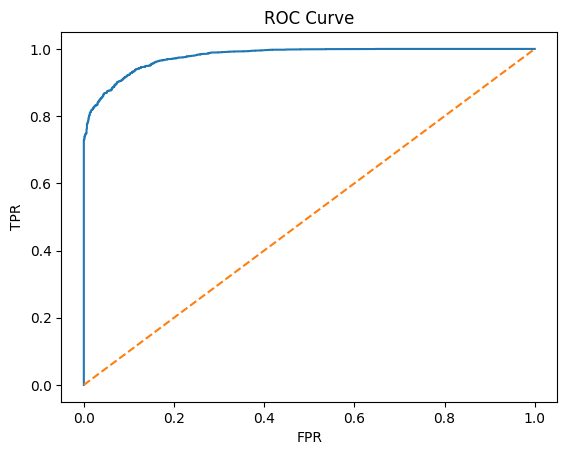

In [29]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [30]:
# Quick check of first 5 samples
for i in range(30):
    actual = y_test.iloc[i]; pred = model.predict(X_test.iloc[i:i+1])[0]
    print(f"Sample {i}: Actual={actual}, Predicted={pred}, {'✓' if actual==pred else '✗'}")

Sample 0: Actual=0, Predicted=1, ✗
Sample 1: Actual=1, Predicted=1, ✓
Sample 2: Actual=1, Predicted=0, ✗
Sample 3: Actual=1, Predicted=1, ✓
Sample 4: Actual=1, Predicted=1, ✓
Sample 5: Actual=0, Predicted=0, ✓
Sample 6: Actual=1, Predicted=1, ✓
Sample 7: Actual=0, Predicted=0, ✓
Sample 8: Actual=0, Predicted=0, ✓
Sample 9: Actual=1, Predicted=1, ✓
Sample 10: Actual=1, Predicted=1, ✓
Sample 11: Actual=0, Predicted=1, ✗
Sample 12: Actual=1, Predicted=1, ✓
Sample 13: Actual=1, Predicted=1, ✓
Sample 14: Actual=0, Predicted=0, ✓
Sample 15: Actual=1, Predicted=1, ✓
Sample 16: Actual=1, Predicted=1, ✓
Sample 17: Actual=1, Predicted=1, ✓
Sample 18: Actual=0, Predicted=0, ✓
Sample 19: Actual=1, Predicted=1, ✓
Sample 20: Actual=1, Predicted=1, ✓
Sample 21: Actual=1, Predicted=0, ✗
Sample 22: Actual=1, Predicted=1, ✓
Sample 23: Actual=1, Predicted=1, ✓
Sample 24: Actual=1, Predicted=1, ✓
Sample 25: Actual=0, Predicted=0, ✓
Sample 26: Actual=1, Predicted=1, ✓
Sample 27: Actual=1, Predicted=1, ✓
Sa

# **RandomForest**

In [35]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1%}")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_proba)))

Accuracy: 93.5%
[[2057  125]
 [ 240 3195]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2182
           1       0.96      0.93      0.95      3435

    accuracy                           0.94      5617
   macro avg       0.93      0.94      0.93      5617
weighted avg       0.94      0.94      0.94      5617

ROC AUC: 0.987


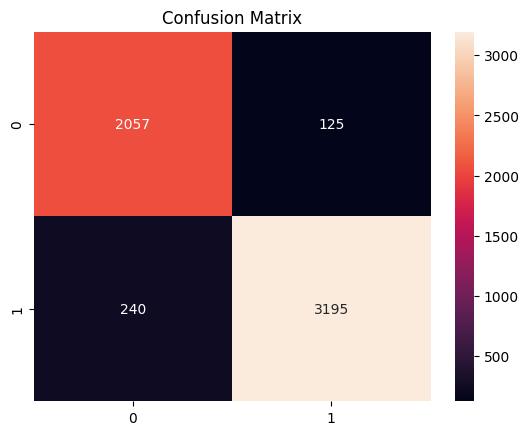

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

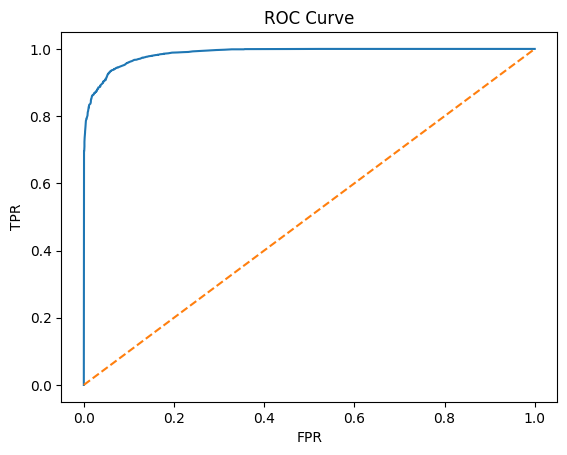

In [37]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [38]:
# Quick check of first 5 samples
for i in range(30):
    actual = y_test.iloc[i]; pred = model.predict(X_test.iloc[i:i+1])[0]
    print(f"Sample {i}: Actual={actual}, Predicted={pred}, {'✓' if actual==pred else '✗'}")

Sample 0: Actual=0, Predicted=0, ✓
Sample 1: Actual=1, Predicted=1, ✓
Sample 2: Actual=1, Predicted=1, ✓
Sample 3: Actual=1, Predicted=1, ✓
Sample 4: Actual=1, Predicted=1, ✓
Sample 5: Actual=0, Predicted=0, ✓
Sample 6: Actual=1, Predicted=1, ✓
Sample 7: Actual=0, Predicted=0, ✓
Sample 8: Actual=0, Predicted=0, ✓
Sample 9: Actual=1, Predicted=1, ✓
Sample 10: Actual=1, Predicted=1, ✓
Sample 11: Actual=0, Predicted=0, ✓
Sample 12: Actual=1, Predicted=1, ✓
Sample 13: Actual=1, Predicted=1, ✓
Sample 14: Actual=0, Predicted=0, ✓
Sample 15: Actual=1, Predicted=1, ✓
Sample 16: Actual=1, Predicted=1, ✓
Sample 17: Actual=1, Predicted=1, ✓
Sample 18: Actual=0, Predicted=0, ✓
Sample 19: Actual=1, Predicted=1, ✓
Sample 20: Actual=1, Predicted=1, ✓
Sample 21: Actual=1, Predicted=0, ✗
Sample 22: Actual=1, Predicted=1, ✓
Sample 23: Actual=1, Predicted=1, ✓
Sample 24: Actual=1, Predicted=1, ✓
Sample 25: Actual=0, Predicted=0, ✓
Sample 26: Actual=1, Predicted=1, ✓
Sample 27: Actual=1, Predicted=1, ✓
Sa

# **GradientBoosting**

In [39]:
model =GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1%}")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_proba)))

Accuracy: 94.5%
[[2023  159]
 [ 150 3285]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2182
           1       0.95      0.96      0.96      3435

    accuracy                           0.94      5617
   macro avg       0.94      0.94      0.94      5617
weighted avg       0.94      0.94      0.94      5617

ROC AUC: 0.987


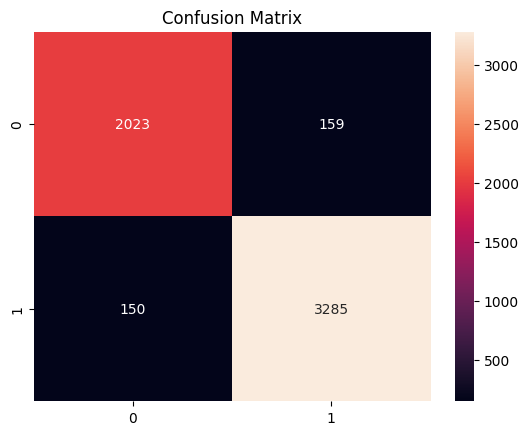

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

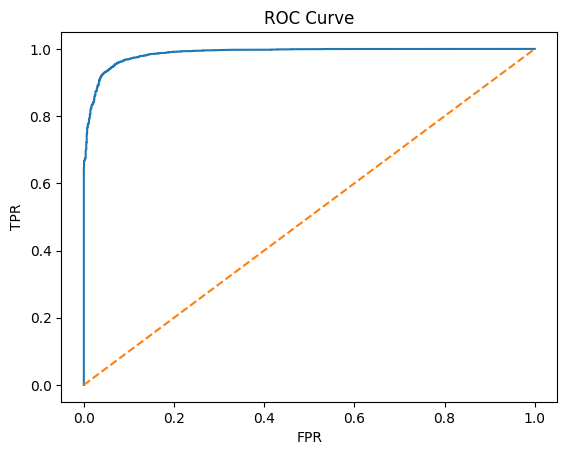

In [41]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [42]:
# Quick check of first 5 samples
for i in range(30):
    actual = y_test.iloc[i]; pred = model.predict(X_test.iloc[i:i+1])[0]
    print(f"Sample {i}: Actual={actual}, Predicted={pred}, {'✓' if actual==pred else '✗'}")

Sample 0: Actual=0, Predicted=1, ✗
Sample 1: Actual=1, Predicted=1, ✓
Sample 2: Actual=1, Predicted=1, ✓
Sample 3: Actual=1, Predicted=1, ✓
Sample 4: Actual=1, Predicted=1, ✓
Sample 5: Actual=0, Predicted=0, ✓
Sample 6: Actual=1, Predicted=1, ✓
Sample 7: Actual=0, Predicted=0, ✓
Sample 8: Actual=0, Predicted=0, ✓
Sample 9: Actual=1, Predicted=1, ✓
Sample 10: Actual=1, Predicted=1, ✓
Sample 11: Actual=0, Predicted=1, ✗
Sample 12: Actual=1, Predicted=1, ✓
Sample 13: Actual=1, Predicted=1, ✓
Sample 14: Actual=0, Predicted=0, ✓
Sample 15: Actual=1, Predicted=1, ✓
Sample 16: Actual=1, Predicted=1, ✓
Sample 17: Actual=1, Predicted=1, ✓
Sample 18: Actual=0, Predicted=0, ✓
Sample 19: Actual=1, Predicted=1, ✓
Sample 20: Actual=1, Predicted=1, ✓
Sample 21: Actual=1, Predicted=0, ✗
Sample 22: Actual=1, Predicted=1, ✓
Sample 23: Actual=1, Predicted=1, ✓
Sample 24: Actual=1, Predicted=1, ✓
Sample 25: Actual=0, Predicted=0, ✓
Sample 26: Actual=1, Predicted=1, ✓
Sample 27: Actual=1, Predicted=1, ✓
Sa


Model: Logistic Regression
Accuracy  : 96.5%
Error Rate: 3.5%
ROC AUC   : 0.996

Error Metrics:
MAE  : 0.035
MSE  : 0.035
RMSE : 0.188
Confusion Matrix:
[[2082  100]
 [  98 3337]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2182
           1       0.97      0.97      0.97      3435

    accuracy                           0.96      5617
   macro avg       0.96      0.96      0.96      5617
weighted avg       0.96      0.96      0.96      5617



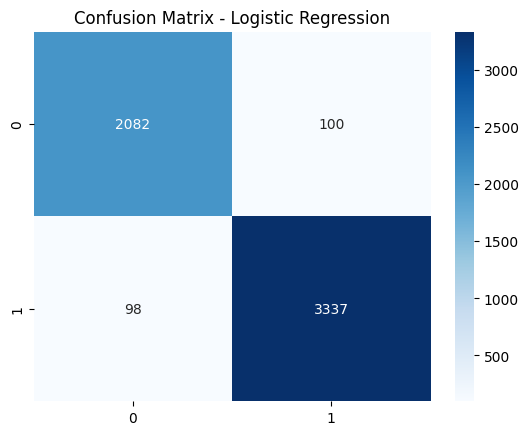

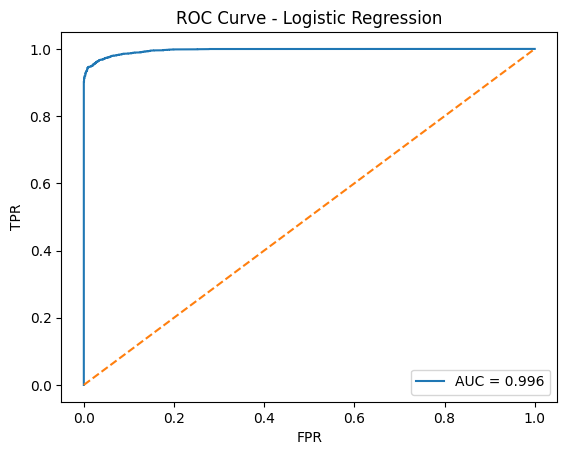


Model: Random Forest
Accuracy  : 93.9%
Error Rate: 6.1%
ROC AUC   : 0.988

Error Metrics:
MAE  : 0.061
MSE  : 0.061
RMSE : 0.247
Confusion Matrix:
[[2060  122]
 [ 221 3214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2182
           1       0.96      0.94      0.95      3435

    accuracy                           0.94      5617
   macro avg       0.93      0.94      0.94      5617
weighted avg       0.94      0.94      0.94      5617



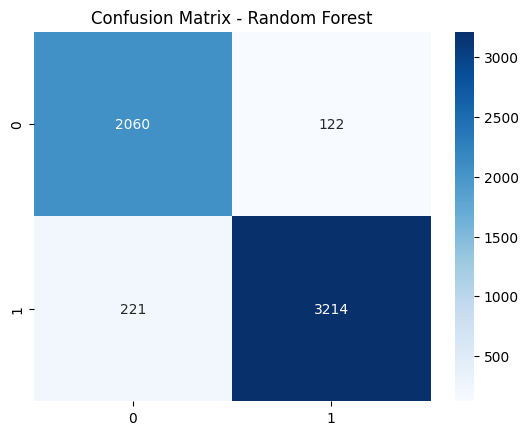

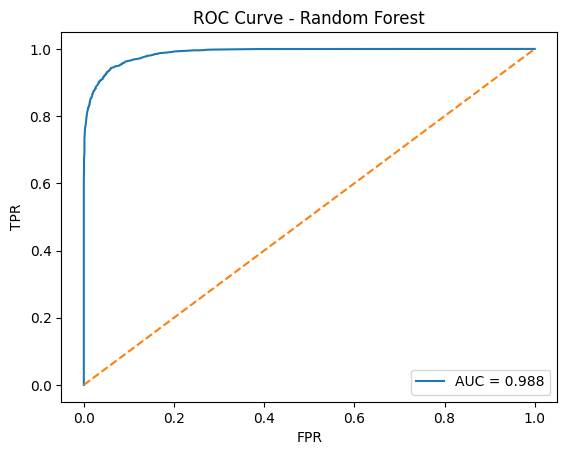


Model: Gradient Boosting
Accuracy  : 94.5%
Error Rate: 5.5%
ROC AUC   : 0.987

Error Metrics:
MAE  : 0.055
MSE  : 0.055
RMSE : 0.235
Confusion Matrix:
[[2023  159]
 [ 150 3285]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2182
           1       0.95      0.96      0.96      3435

    accuracy                           0.94      5617
   macro avg       0.94      0.94      0.94      5617
weighted avg       0.94      0.94      0.94      5617



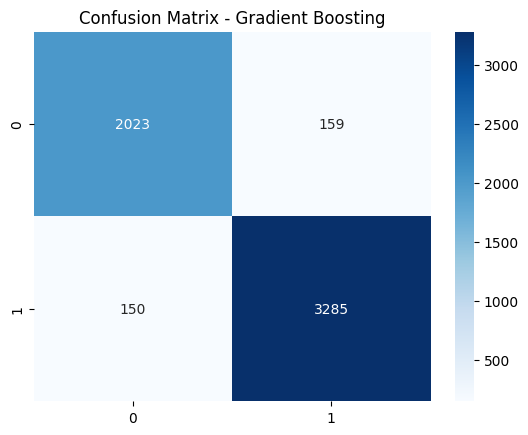

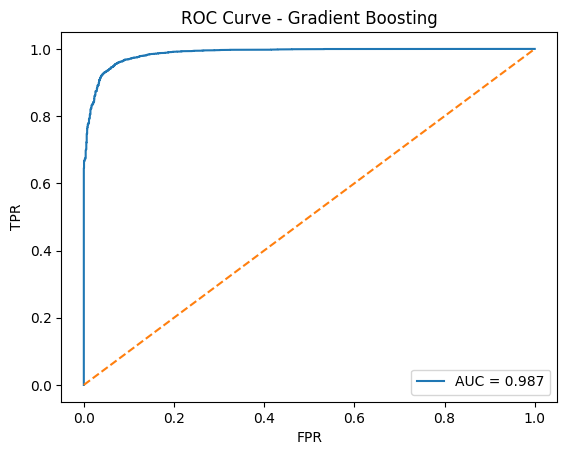


Model: SVM (linear)
Accuracy  : 96.6%
Error Rate: 3.4%
ROC AUC   : 0.996

Error Metrics:
MAE  : 0.034
MSE  : 0.034
RMSE : 0.185
Confusion Matrix:
[[2095   87]
 [ 105 3330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2182
           1       0.97      0.97      0.97      3435

    accuracy                           0.97      5617
   macro avg       0.96      0.96      0.96      5617
weighted avg       0.97      0.97      0.97      5617



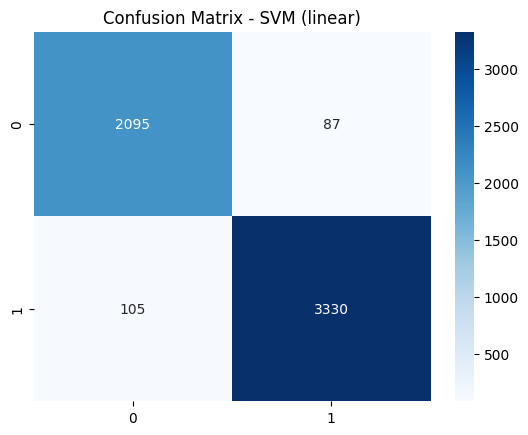

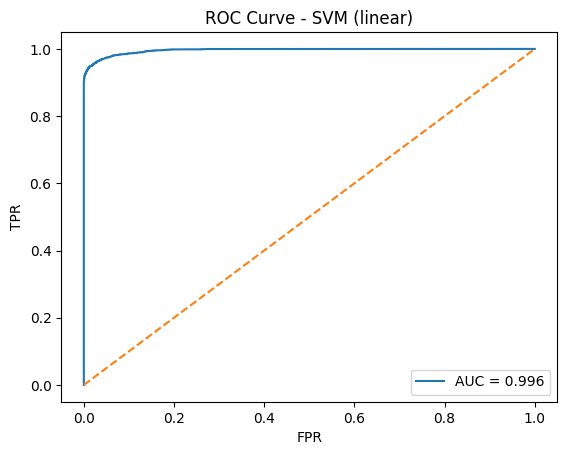


Model: AdaBoost
Accuracy  : 91.7%
Error Rate: 8.3%
ROC AUC   : 0.978

Error Metrics:
MAE  : 0.083
MSE  : 0.083
RMSE : 0.288
Confusion Matrix:
[[1934  248]
 [ 217 3218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2182
           1       0.93      0.94      0.93      3435

    accuracy                           0.92      5617
   macro avg       0.91      0.91      0.91      5617
weighted avg       0.92      0.92      0.92      5617



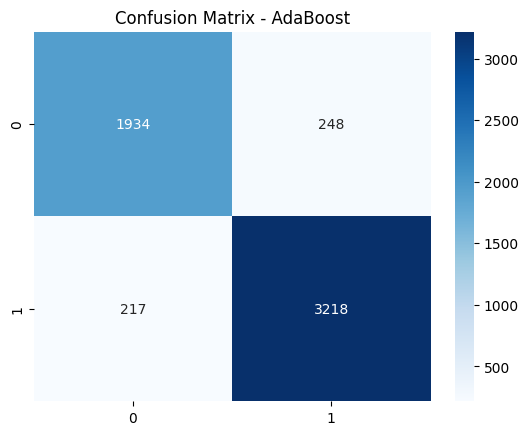

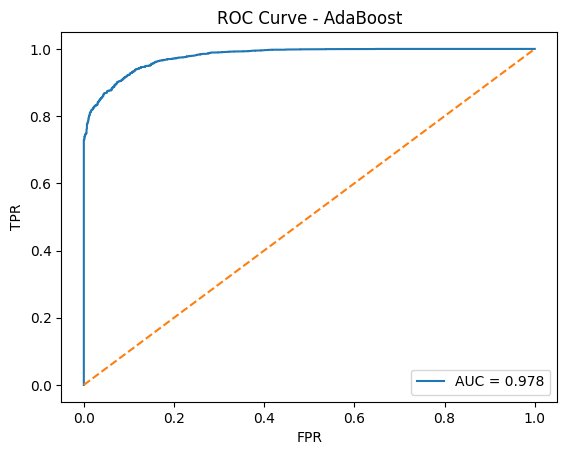

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve,
    mean_absolute_error, mean_squared_error
)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM (linear)': SVC(kernel='linear', probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}


# =========================
# Evaluation Function
# =========================
def train_evaluate_model(name, model, X_train, X_test, y_train, y_test):
    print(f"\n{'='*45}")
    print(f"Model: {name}")
    print(f"{'='*45}")

    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # =====================
    # Classification Metrics
    # =====================
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy  : {accuracy:.1%}")
    print(f"Error Rate: {error_rate:.1%}")
    print(f"ROC AUC   : {roc_auc:.3f}\n")

    # =====================
    # Regression-style Errors
    # =====================
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5


    print("Error Metrics:")
    print(f"MAE  : {mae:.3f}")
    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:.3f}")


    # =====================
    # Confusion Matrix
    # =====================
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # =====================
    # ROC Curve
    # =====================
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()


# =========================
# Run all models
# =========================
for name, model in models.items():
    train_evaluate_model(name, model, X_train, X_test, y_train, y_test)


# **K_means**

In [20]:
from sklearn.cluster import KMeans